In [9]:
# prerequisites 
import csv
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import pandas as pd
from sklearn.metrics import mean_squared_error


def readDatas(dataPath: str):
    df = pd.read_csv(dataPath,delimiter=',', header='infer')
    return df.dropna()

def plotDataDistribution(df_world_happiness):
    fig,axes = plt.subplots(nrows=2,figsize=(15,15))

    axes[0].hist(df_world_happiness["Happiness.Score"])
    axes[0].set_title("Happiness")

    axes[1].hist(df_world_happiness["Family"])
    axes[1].set_title("Family")
    plt.show()

def plotData(df_world_happiness):
    fig,axes = plt.subplots()

    axes.plot(df_world_happiness["Family"],df_world_happiness["Happiness.Score"], 'ro') 
    axes.set_xlabel('Family')
    axes.set_ylabel('Happiness')
    axes.set_title('Relation between Family and Happiness')
    plt.show()

def getTrainingAndValidationSets(df_world_happiness):
    dataSize = df_world_happiness.shape[0]
    trainingIndexSet = np.random.choice(range(dataSize),size=int(0.8 * dataSize),replace=False)
    validationIndexSet = [i for i in range(dataSize) if i not in trainingIndexSet] 

    trainingInputSet = [df_world_happiness["Family"].iloc[index] for index in trainingIndexSet ]
    trainingOutputSet = [df_world_happiness["Happiness.Score"].iloc[index] for index in trainingIndexSet ]

    validationInputSet = [df_world_happiness["Family"].iloc[index] for index in validationIndexSet ]
    validationOutputSet = [df_world_happiness["Happiness.Score"].iloc[index] for index in validationIndexSet ]
    
    return trainingInputSet, trainingOutputSet, validationInputSet, validationOutputSet

def plotTrainingAndValidationDatas(df_world_happiness):
    trainingInputSet, trainingOutputSet, validationInputSet, validationOutputSet = getTrainingAndValidationSets(df_world_happiness)
    fig, axes = plt.subplots()

    plt.plot(trainingInputSet, trainingOutputSet, 'ro', label = 'training data')   #train data are plotted by red and circle sign
    plt.plot(validationInputSet, validationOutputSet, 'g^', label = 'validation data')     #test data are plotted by green and a triangle sign
    axes.set_title("train and validation data")
    axes.set_xlabel('Family')
    axes.set_ylabel('happiness')
    plt.legend()
    plt.show()

def getRegressor(df_world_happiness):
    trainingInputSet, trainingOutputSet, _, _ = getTrainingAndValidationSets(df_world_happiness)
    xx = [[el] for el in trainingInputSet]

    regressor = linear_model.LinearRegression()
    regressor.fit(xx, trainingOutputSet)

    return regressor

def plotRegressor(df_world_happiness):

    trainingInputSet, trainingOutputSet, _, _ = getTrainingAndValidationSets(df_world_happiness)
    regressor = getRegressor(df_world_happiness)
    w0, w1 = regressor.intercept_, regressor.coef_[0]
    noOfPoints = 1000
    xref = []
    val = min(trainingInputSet)
    step = (max(trainingInputSet) - min(trainingInputSet)) / noOfPoints
    for i in range(1, noOfPoints):
        xref.append(val)
        val += step
    yref = [w0 + w1 * el for el in xref] 

    fix,axes = plt.subplots()

    axes.plot(trainingInputSet, trainingOutputSet, 'ro', label = 'training data')  #train data are plotted by red and circle sign
    axes.plot(xref, yref, 'b-', label = 'learnt model')                  #model is plotted by a blue line
    axes.set_title('train data and the learnt model')
    axes.set_xlabel('Family')
    axes.set_ylabel('happiness')
    axes.legend()
    plt.show()

def getErrors(df_world_happiness):
    _,_,validationInputSet, validationOutputSet = getTrainingAndValidationSets(df_world_happiness)
    regressor = getRegressor(df_world_happiness)
    computedValidationOutputs = regressor.predict([[x] for x in validationInputSet])
    manualError = 0.0
    for t1, t2 in zip(computedValidationOutputs, validationOutputSet):
        manualError += (t1 - t2) ** 2
    manualError = manualError / len(validationOutputSet)
    computedError = mean_squared_error(validationOutputSet, computedValidationOutputs)
    return manualError, computedError


## V1

In [10]:
df_world_happiness_v1 = readDatas('datas/v1_world-happiness-report-2017.csv')

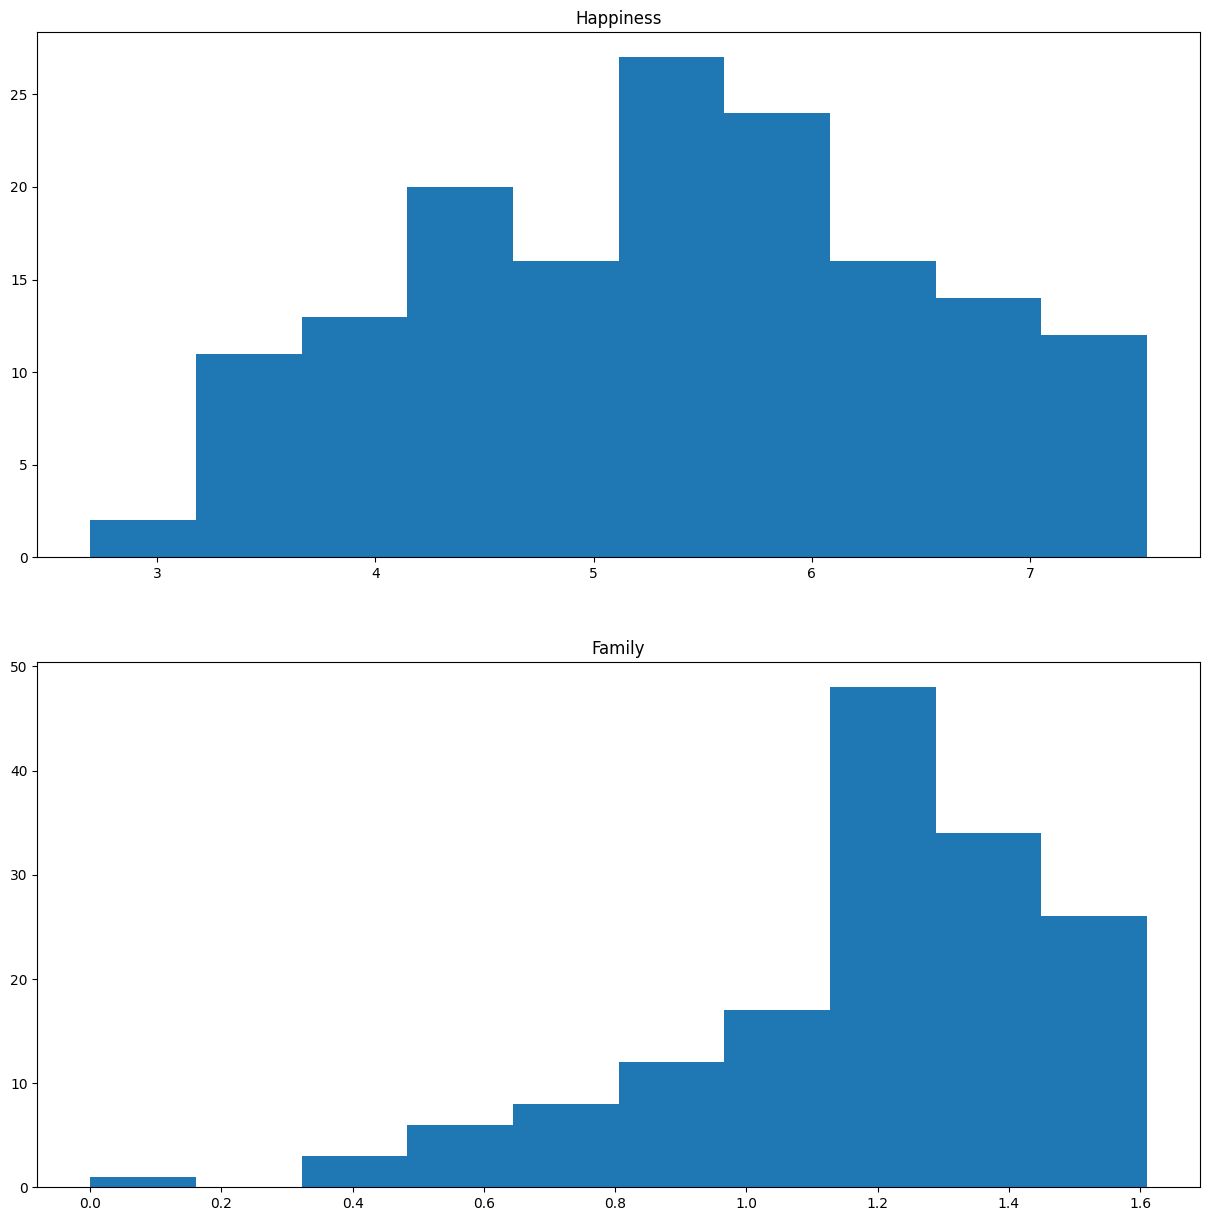

In [11]:
plotDataDistribution(df_world_happiness_v1)

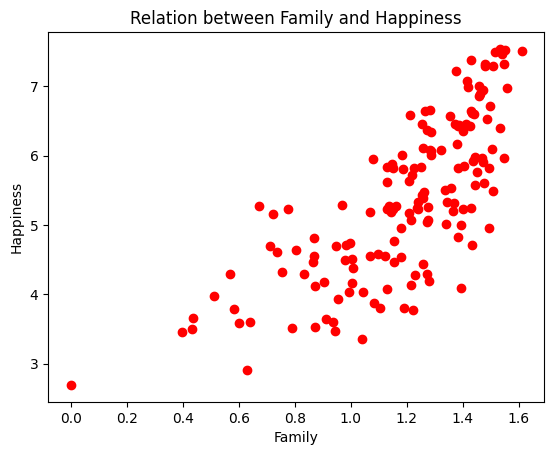

In [12]:
plotData(df_world_happiness_v1)

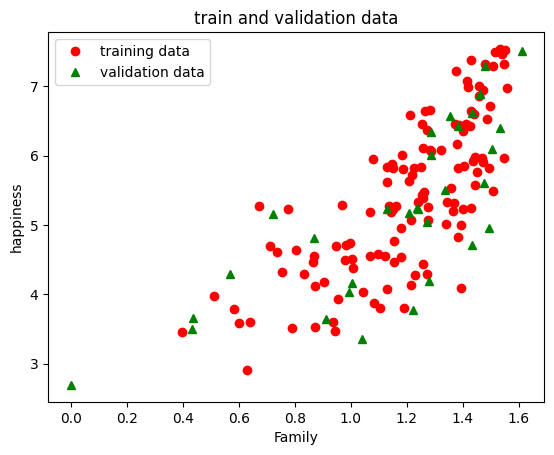

In [13]:
plotTrainingAndValidationDatas(df_world_happiness_v1)

In [14]:
regressor = getRegressor(df_world_happiness_v1)
w0, w1 = regressor.intercept_, regressor.coef_[0]
print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x')

the learnt model: f(x) =  1.7861889979251604  +  3.043225384328302  * x


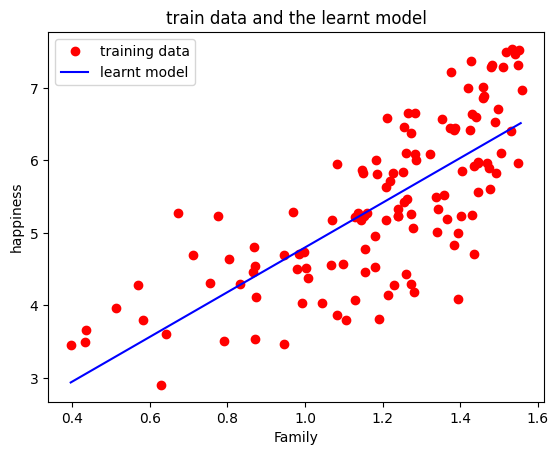

In [15]:
plotRegressor(df_world_happiness_v1)

In [16]:
mErr, cErr = getErrors(df_world_happiness_v1)
print("Manual error: {}\nComputed error: {}".format(mErr, cErr))

Manual error: 0.5199565041711617
Computed error: 0.5199565041711617


## V2

In [17]:
df_world_happiness_v2 = readDatas('datas/v2_world-happiness-report-2017.csv')

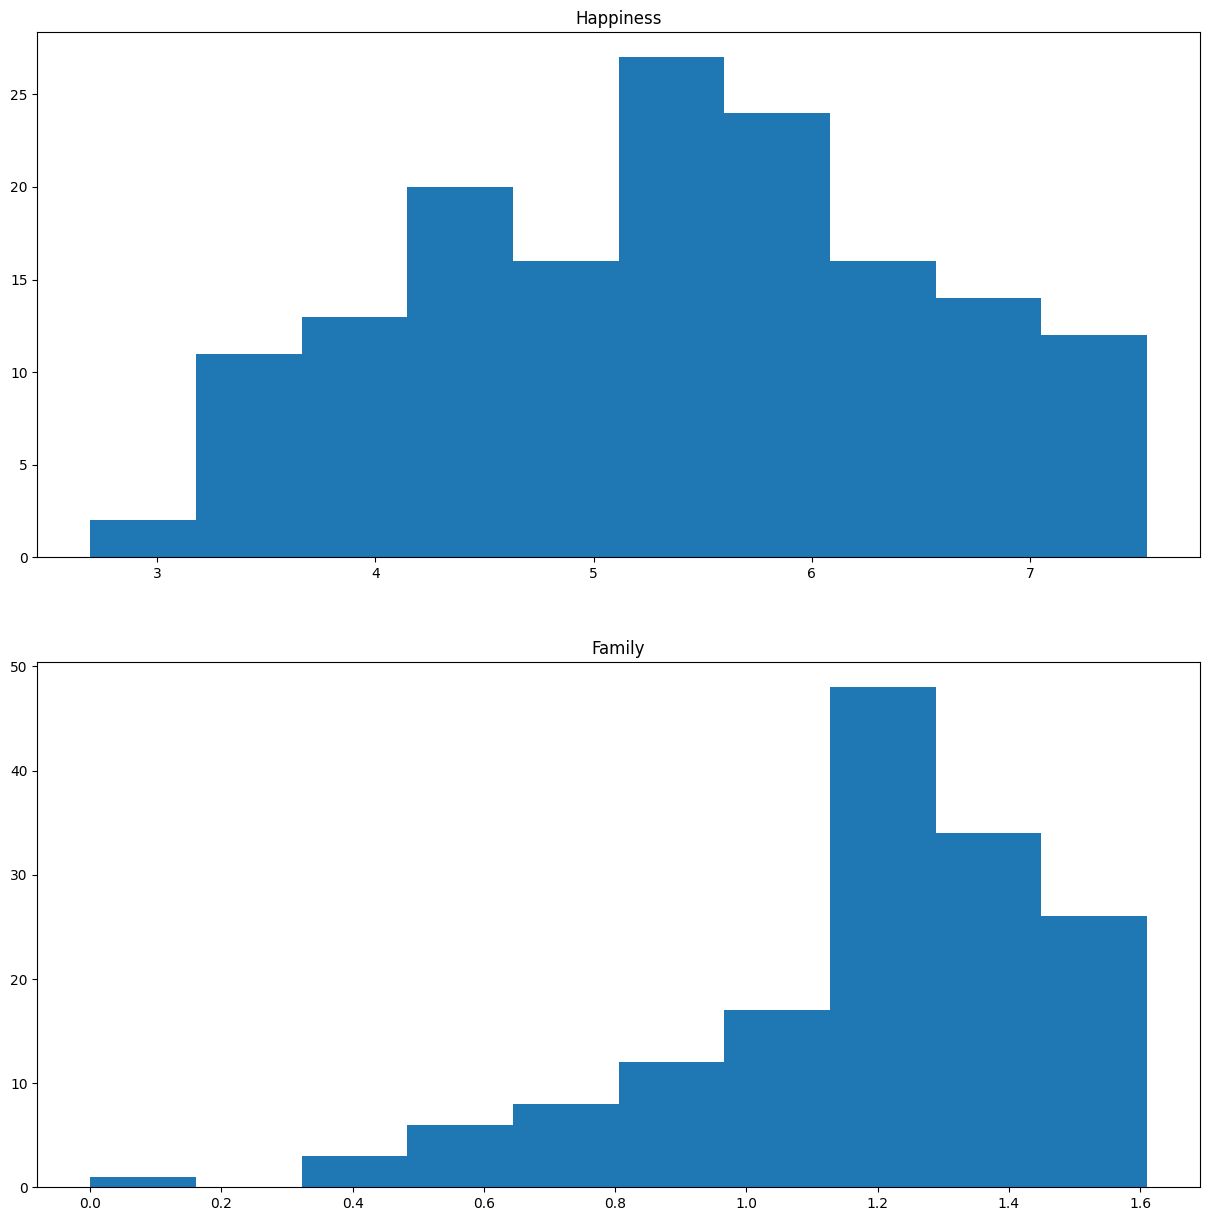

In [18]:
plotDataDistribution(df_world_happiness_v2)

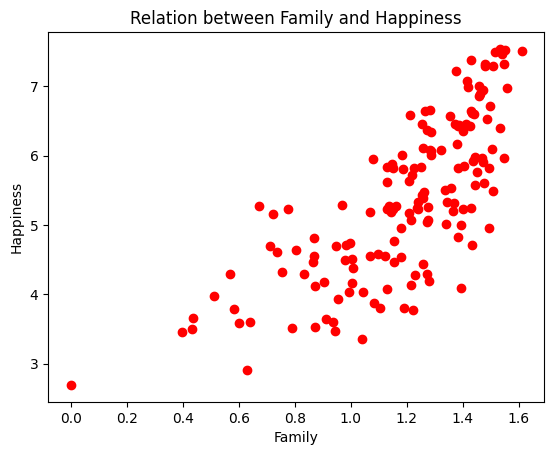

In [19]:
plotData(df_world_happiness_v2)

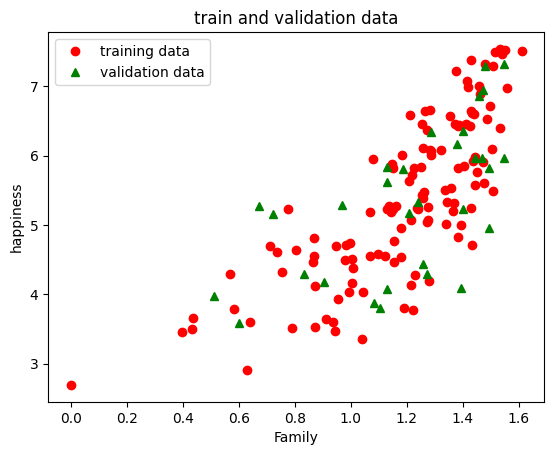

In [20]:
plotTrainingAndValidationDatas(df_world_happiness_v2)

In [21]:
regressor = getRegressor(df_world_happiness_v2)
w0, w1 = regressor.intercept_, regressor.coef_[0]
print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x')

the learnt model: f(x) =  1.8723869164758042  +  2.9472562920370695  * x


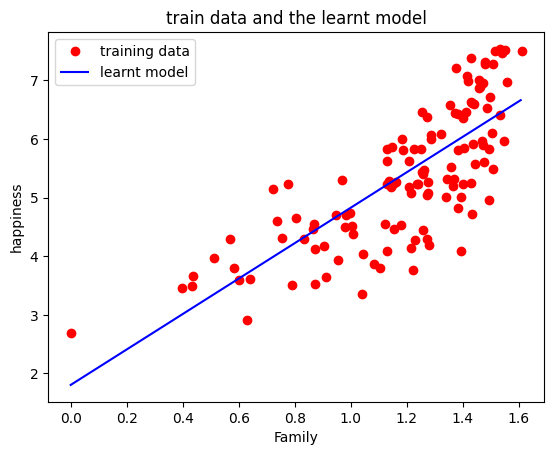

In [22]:
plotRegressor(df_world_happiness_v2)

In [23]:
mErr, cErr = getErrors(df_world_happiness_v2)
print("Manual error: {}\nComputed error: {}".format(mErr, cErr))

Manual error: 0.49459019129280724
Computed error: 0.49459019129280724


## V3

In [24]:
df_world_happiness_v3 = readDatas('datas/v3_world-happiness-report-2017.csv')

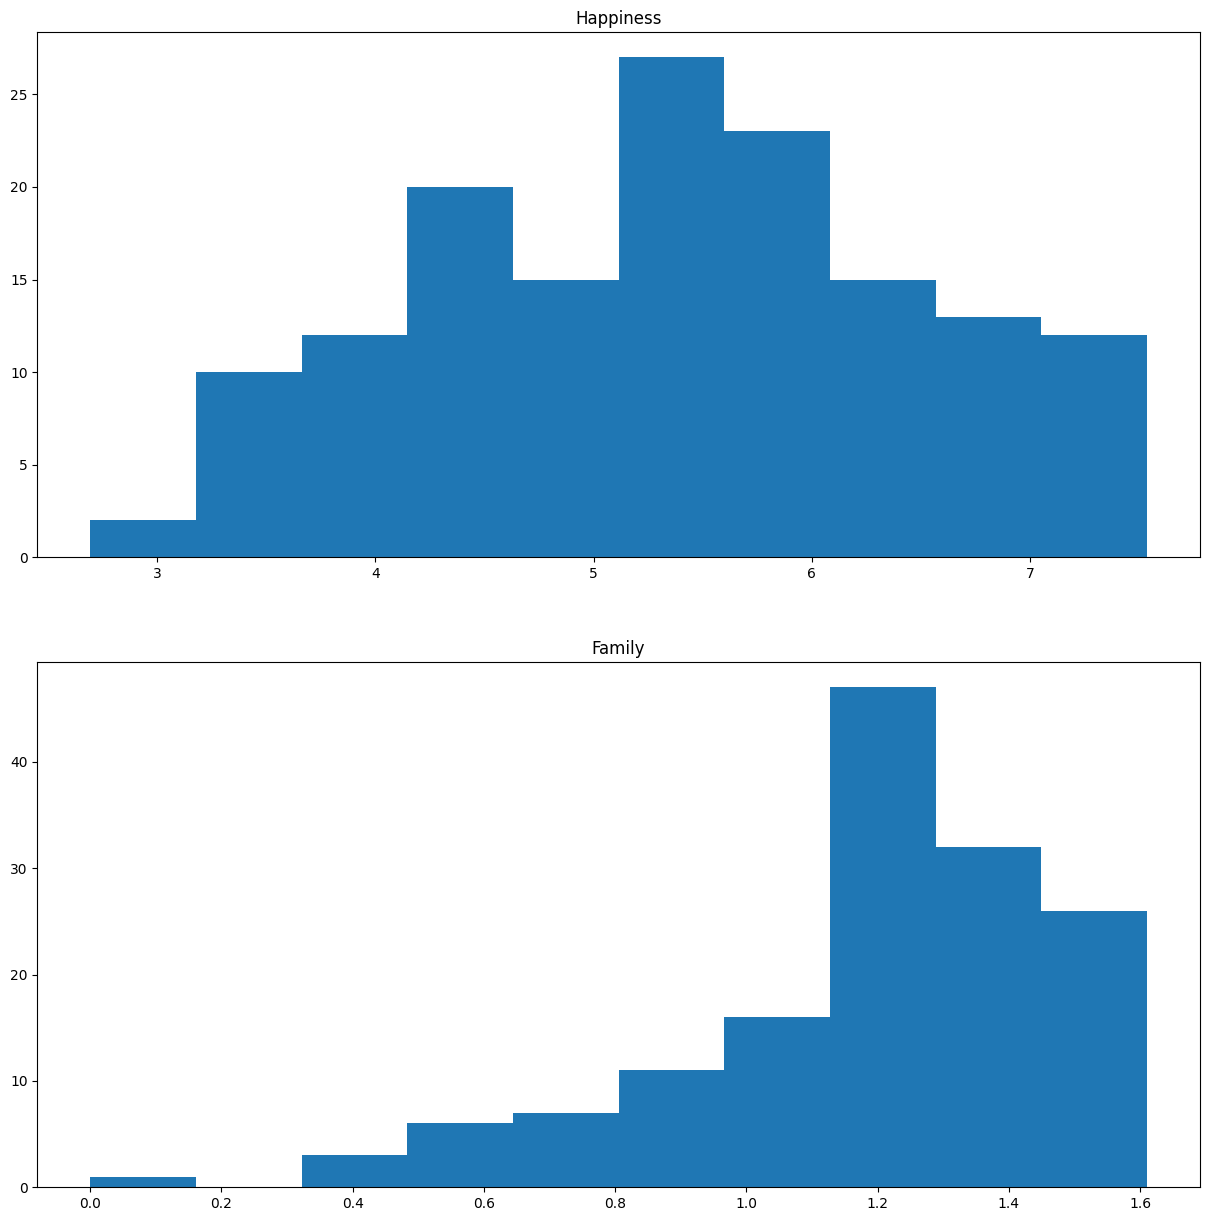

In [25]:
plotDataDistribution(df_world_happiness_v3)

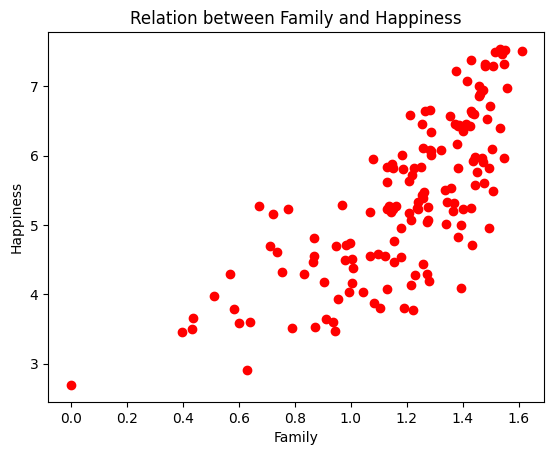

In [26]:
plotData(df_world_happiness_v3)

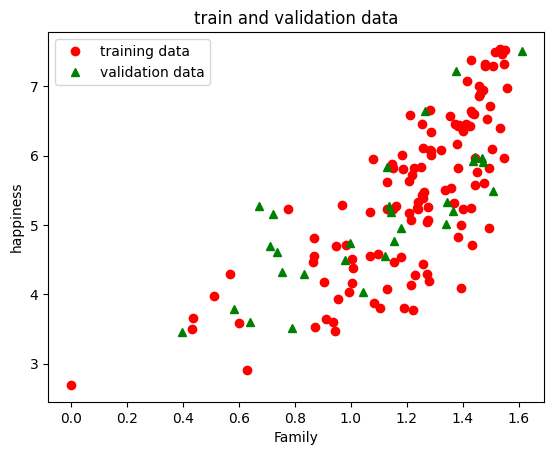

In [27]:
plotTrainingAndValidationDatas(df_world_happiness_v3)

In [28]:
regressor = getRegressor(df_world_happiness_v3)
w0, w1 = regressor.intercept_, regressor.coef_[0]
print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x')

the learnt model: f(x) =  2.049674560995511  +  2.773582663823866  * x


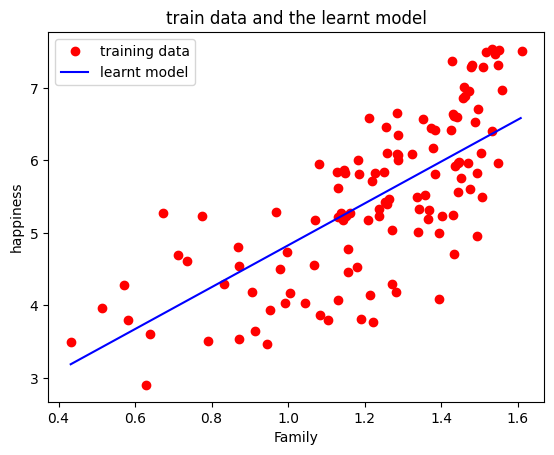

In [29]:
plotRegressor(df_world_happiness_v3)

In [30]:
mErr, cErr = getErrors(df_world_happiness_v3)
print("Manual error: {}\nComputed error: {}".format(mErr, cErr))

Manual error: 0.6830298387061963
Computed error: 0.6830298387061963
